# Redes Neuronales Artificiales & Deep Learning

## Objetivos de este curso

- **Conocer, entender y aplicar algunos modelos clásicos de Redes Neuronales Artificiales**, y algunas habilidades útiles en la práctica.
- **Conocer los conceptos básicos del Aprendizaje Profundo y aplicar las herramientas para desarrollar aplicaciones de machine learning**.
- **Aprender a utilizar los modelos de Deep Learning de Keras con la biblioteca Scikit-Learn de Python**, y evaluar los modelos de Keras utilizando la validación cruzada en scikit-learn (la biblioteca scikit-learn es la biblioteca más popular para Machine Learning en Python).
- **Identificar el tipo de red neuronal más adecuado para cada problema**, y las limitaciones de cada arquitectura.
- **Presentar a Python como herramienta de simulación de Redes Neuronales Artificiales**, y el ambiente de trabajo del curso!!!

## Schedule:

- Comenzando...
- Introducción
- Perceptrón
- Redes neuronales estáticas
- Redes recurrentes y mapas auto-organizados
- Memorias asociativas y Redes de funcion de base radial
- Introducción a las bibliotecas de aprendizaje profundo
- Modelos de regresión con Keras
- Modelos de clasificación con Keras
- Redes neuronales convolucionales
- Redes neuronales recurrentes

# Creación de una RNA en Python

In [1]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
colab_path = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

Primero se crea la estructura de la red neuronal con 3 capas, neuronas con valores de entrada/salida -1 a 1 (se incluye también la sigmoide o logística con valores entre 0 y 1):

In [3]:
import numpy as np

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_derivada(x):
    return sigmoid(x)*(1.0-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivada(x):
    return 1.0 - x**2


class NeuralNetwork:

    def __init__(self, layers, activation='tanh'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_derivada
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_derivada

        # inicializo los pesos
        self.weights = []
        self.deltas = []
        # capas = [2,3,2]
        # rando de pesos varia entre (-1,1)
        # asigno valores aleatorios a capa de entrada y capa oculta
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        # asigno aleatorios a capa de salida
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        # Agrego columna de unos a las entradas X
        # Con esto agregamos la unidad de Bias a la capa de entrada
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # Calculo la diferencia en la capa de salida y el valor obtenido
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]
            
            # Empezamos en el segundo layer hasta el ultimo
            # (Una capa anterior a la de salida)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))
            self.deltas.append(deltas)

            # invertir
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiplcar los delta de salida con las activaciones de entrada 
            #    para obtener el gradiente del peso.
            # 2. actualizo el peso restandole un porcentaje del gradiente
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            if k % 10000 == 0: print('epochs:', k)

    def predict(self, x): 
        ones = np.atleast_2d(np.ones(x.shape[0]))
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=0)
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

    def print_weights(self):
        print("LISTADO PESOS DE CONEXIONES")
        for i in range(len(self.weights)):
            print(self.weights[i])

    def get_deltas(self):
        return self.deltas

## Función XOR: red [2,2,1]

Evaluamos para la XOR primero el primer caso de una red neuronal de tamaño [2,2,1] con función de activación *tanh*:

In [5]:
# funcion XOR
nn = NeuralNetwork([2,2,1],activation ='tanh')
X = np.array([[-0.80, -0.85],
            [-0.91, 0.92],
            [0.87, -0.87],
            [0.96, 0.83],
            [-0.97, -0.93],
            [-0.82, 0.87],
            [0.93, -0.99],
            [0.80, 0.98],
            [-0.83, -0.94],
            [-0.84, 0.92],
            [0.89, -0.87]])
y = np.array([-0.90, 
              0.89, 
              0.86, 
              -0.89, 
              -0.82, 
              0.98, 
              0.95, 
              -0.93, 
              -0.88, 
              0.84, 
              0.96])
nn.fit(X, y, learning_rate=0.03,epochs=10001)

index=0
for e in X:
    print("Entradas:",e,"Salidas:",nn.predict(e))
    index=index+1

epochs: 0
epochs: 10000
Entradas: [-0.8  -0.85] Salidas: [-0.8589018]
Entradas: [-0.91  0.92] Salidas: [0.90073751]
Entradas: [ 0.87 -0.87] Salidas: [0.91177457]
Entradas: [0.96 0.83] Salidas: [-0.9030736]
Entradas: [-0.97 -0.93] Salidas: [-0.89631225]
Entradas: [-0.82  0.87] Salidas: [0.88903907]
Entradas: [ 0.93 -0.99] Salidas: [0.91962029]
Entradas: [0.8  0.98] Salidas: [-0.90199839]
Entradas: [-0.83 -0.94] Salidas: [-0.8641944]
Entradas: [-0.84  0.92] Salidas: [0.89438457]
Entradas: [ 0.89 -0.87] Salidas: [0.91378411]


In [6]:
nn.print_weights()

LISTADO PESOS DE CONEXIONES
[[ 0.08101643  1.43072562  1.40309913]
 [-1.42091716 -1.258188    1.37501615]
 [-0.13897432  1.56501129  1.57275451]]
[[ 1.89215336]
 [-1.85129769]
 [ 1.86997646]]


### Grafica del error

Vemos como el gradiente desciende y disminuye el error a medida que pasan las iteraciones de aprendizaje

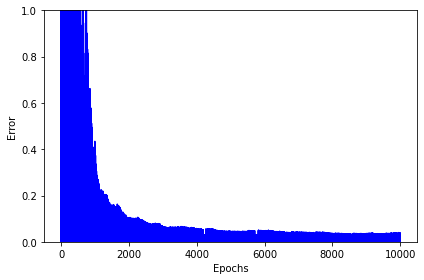

In [7]:
import matplotlib.pyplot as plt

deltas = nn.get_deltas()
valores=[]
index=0
for arreglo in deltas:
    valores.append(arreglo[1][0] + arreglo[1][0])
    index=index+1

plt.plot(range(len(valores)), valores, color='b')
plt.ylim([0, 1])
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

## Función XOR: red [2,6,1]

Evaluamos para la XOR primero el primer caso de una red neuronal de tamaño [2,6,1] con función de activación *tanh*:

In [8]:
# funcion XOR
nn1 = NeuralNetwork([2,6,1],activation ='tanh')
X = np.array([[-0.80, -0.85],
            [-0.91, 0.92],
            [0.87, -0.87],
            [0.96, 0.83],
            [-0.97, -0.93],
            [-0.82, 0.87],
            [0.93, -0.99],
            [0.80, 0.98],
            [-0.83, -0.94],
            [-0.84, 0.92],
            [0.89, -0.87]])
y = np.array([-0.90, 
              0.89, 
              0.86, 
              -0.89, 
              -0.82, 
              0.98, 
              0.95, 
              -0.93, 
              -0.88, 
              0.84, 
              0.96])
nn1.fit(X, y, learning_rate=0.03,epochs=10001)

index=0
for e in X:
    print("Entradas:",e,"Salidas:",nn1.predict(e))
    index=index+1

epochs: 0
epochs: 10000
Entradas: [-0.8  -0.85] Salidas: [-0.85143769]
Entradas: [-0.91  0.92] Salidas: [0.91098375]
Entradas: [ 0.87 -0.87] Salidas: [0.91174684]
Entradas: [0.96 0.83] Salidas: [-0.89844149]
Entradas: [-0.97 -0.93] Salidas: [-0.88855047]
Entradas: [-0.82  0.87] Salidas: [0.89857902]
Entradas: [ 0.93 -0.99] Salidas: [0.93062092]
Entradas: [0.8  0.98] Salidas: [-0.91794019]
Entradas: [-0.83 -0.94] Salidas: [-0.86766672]
Entradas: [-0.84  0.92] Salidas: [0.90465699]
Entradas: [ 0.89 -0.87] Salidas: [0.9144707]


In [9]:
nn1.print_weights()

LISTADO PESOS DE CONEXIONES
[[ 1.20190213  0.43810655 -0.58526904 -1.13422333  0.27720341 -0.75705493
   0.93008934]
 [-0.9785545   0.59577098 -0.42607263 -1.28320209 -0.13633656  1.21270247
   0.59734923]
 [-1.15374011  0.25141388 -0.05441109  1.36142799 -0.40847168 -0.77054129
  -0.84743299]]
[[ 1.43182581]
 [ 0.89326829]
 [-0.71414198]
 [ 1.61238024]
 [ 0.1710287 ]
 [ 1.37813993]
 [-0.30060468]]


### Grafica del error

Vemos como el gradiente desciende y disminuye el error a medida que pasan las iteraciones de aprendizaje

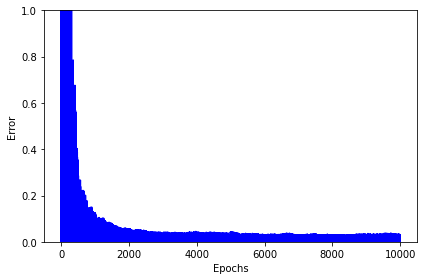

In [10]:
import matplotlib.pyplot as plt

deltas = nn1.get_deltas()
valores=[]
index=0
for arreglo in deltas:
    valores.append(arreglo[1][0] + arreglo[1][0])
    index=index+1

plt.plot(range(len(valores)), valores, color='b')
plt.ylim([0, 1])
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

## Taller: Reconocimiento de caracteres

Se debe diseñar una red neuronal capaz de reconocer las cinco vocales en mayúsculas (A, E, I, O y U). El sistema sensor produce una salida de 15 datos binarios correspondientes a una matriz $5\times3$ (ver figura inferior). Defina un conjunto de patrones de entrenamiento y una red neuronal multicapa, adecuados para identificar los cinco caracteres.

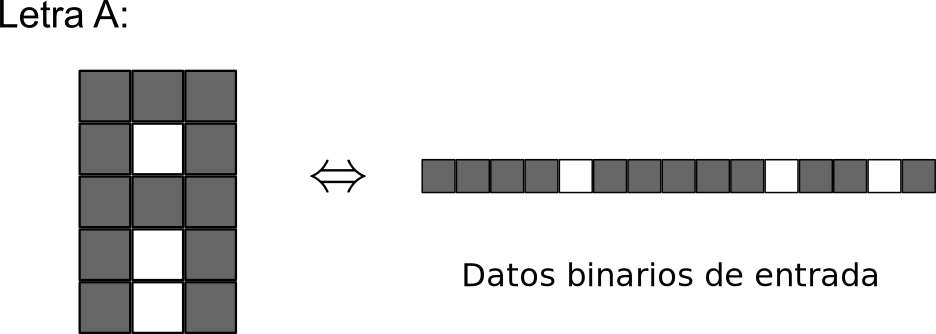

In [ ]:
from IPython.display import SVG
SVG(valid_path + 'intro_fig28.svg')

¿Cómo funciona la red cuando se le ingresa información incompleta o con ruido (letras mal escritas)?

### Solución

Cada carácter se puede representar por una cadena binaria formada por las filas (o, alternativamente las columnas) en orden consecutivo de arriba hacia abajo. Cada carácter forma una matriz $5\times3$ en la cual un $1$ significa punto ocupado por el carácter y $0$ significa punto vacío.

La salida puede obtenerse con cinco neuronas de salida binaria independientes, en cuyo caso cada salida corresponde a una letra; o también puede ser codificada de forma digital. Por ejemplo, dado que se tienen cinco salidas diferentes, se requeriría una cifra digital de tres dígitos binarios (tres dígitos binarios pueden representar ocho salidas diferentes, lo que hace que la codificación sea más eficiente en éste tipo de aplicaciones).

## Taller: Aproximador de curvas

Se ha demostrado matemáticamente que una red neuronal multicapa puede aproximar cualquier función no lineal o mapa no lineal multivariable.

Diseñar y entrenar una red neuronal para aproximar la función discontinua:

$$y=0.1+0.8x\quad si\;0\leq x\leq0.5$$

$$y=0.55-0.5x\quad si\;0.5\leq x\leq1.0$$

## Taller: Identificador de contenido armónico

Un armónico es una magnitud sinusoidal de frecuencia multiplo de una frecuencia fundamental. Diseñe y entrene una red neuronal multicapa para reconocer el contenido armónico (armónicos 3 y 5) de una señal dada. La formula para el contenido armónico es:

$$CA=\frac{V_{m}\left(n\right)}{V_{m}\left(1\right)}\times100\%$$

donde $n$ es el orden del armónico.

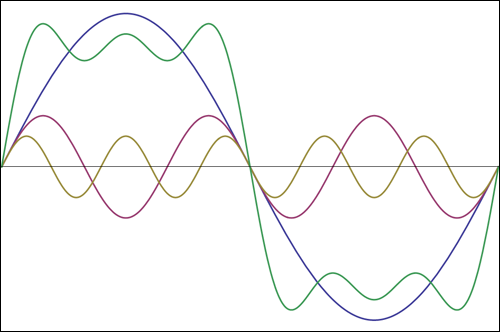

In [ ]:
from IPython.display import Image
Image(filename=valid_path + 'arm35.png')

Para entrenar la red neuronal cree patrones a partir de la señal de voltaje muestreada:

$$v\left[i\right]=v_{1}\left[i\right]+v_{3}\left[i\right]+v_{5}\left[i\right]$$

donde:

$$\begin{array}{c}
v_{1}\left[i\right]=V_{m1}sen\left(\frac{120\pi}{1000}i\right)\\
v_{3}\left[i\right]=V_{m3}sen\left(\frac{360\pi}{1000}i+\phi_{3}\right)\\
v_{5}\left[i\right]=V_{m5}sen\left(\frac{600\pi}{1000}i+\phi_{5}\right)
\end{array}$$

Estas ecuaciones provienen de la discretización de las señales:

$$\begin{array}{c}
v_{1}\left(t\right)=V_{m1}sen\left(2\pi f_{1}t+\phi_{1}\right)\\
v_{3}\left(t\right)=V_{m3}sen\left(2\pi f_{3}t+\phi_{3}\right)\\
v_{5}\left(t\right)=V_{m5}sen\left(2\pi f_{5}t+\phi_{5}\right)
\end{array}$$

con frecuencias de muestreo de 1000 Hz y valores numéricos: $V_{m1}$ = 1, $\phi_{1}$ = 0, $f_1$ = 60 Hz, $f_3$ = 180 Hz, y $f_5$ = 300 Hz. 

Tome 35 muestras por señal $v\left[i\right]$, este segmento contiene dos ciclos de 60 Hz, seis ciclos de 180 Hz y 10 ciclos de 300 Hz.

$$\frac{1}{1000\,Hz}=1\,\textrm{ms de intervalo entre muestras}$$

$$1\,\textrm{ms}\times35=35\,\textrm{ms, aproximadamente dos ciclos de red}$$

Cada $v\left[i\right]$ tiene distintos parámetros $V_{m3}, V_{m5}, \phi_{3}$ y $\phi_{5}$ (los cuales deben ser asumidos), y sus correspondientes contenidos armónicos (los cuales se calculan para los valores asumidos).

La arquitectura de la red es 35-N-2, donde las 35 entradas corresponden a las 35 muestras de la señal $v\left[i\right]$, y las salidas a los dos contenidos armónicos solicitados. Un patron de entrenamiento estará conformado por las 35 muestras de un $v\left[i\right]$ y los correspondientes contenidos armónicos calculados con la formula (salidas deseadas).

Diseñe la red, explique la estructura adoptada, entrenela y demuestre su desempeño.

### Solución

El conjunto de datos de entrenamiento se arma como en el siguiente ejemplo.

In [ ]:
# Contenido armonico
nn = NeuralNetwork([16,2,2],activation ='tanh')
X = np.array([[0.0, 0.11, 0.22, 0.33, 0.43, 0.53, 0.61, 0.69, 0.76, 0.81, 0.86, 0.89, 0.91, 0.93, 0.93, 0.93],
            [0.0, 0.11, 0.22, 0.33, 0.43, 0.53, 0.61, 0.69, 0.76, 0.81, 0.86, 0.89, 0.91, 0.93, 0.93, 0.93],
            [0.0, 0.11, 0.22, 0.33, 0.43, 0.53, 0.61, 0.69, 0.76, 0.81, 0.86, 0.89, 0.91, 0.93, 0.93, 0.93],
            [0.0, 0.11, 0.22, 0.33, 0.43, 0.53, 0.61, 0.69, 0.76, 0.81, 0.86, 0.89, 0.91, 0.93, 0.93, 0.93],
            [0.0, 0.11, 0.22, 0.33, 0.43, 0.53, 0.61, 0.69, 0.76, 0.81, 0.86, 0.89, 0.91, 0.93, 0.93, 0.93],
            [0.0, 0.11, 0.22, 0.33, 0.43, 0.53, 0.61, 0.69, 0.76, 0.81, 0.86, 0.89, 0.91, 0.93, 0.93, 0.93],
            [0.0, 0.11, 0.22, 0.33, 0.43, 0.53, 0.61, 0.69, 0.76, 0.81, 0.86, 0.89, 0.91, 0.93, 0.93, 0.93],
            [0.0, 0.11, 0.22, 0.33, 0.43, 0.53, 0.61, 0.69, 0.76, 0.81, 0.86, 0.89, 0.91, 0.93, 0.93, 0.93],
            [0.0, 0.11, 0.22, 0.33, 0.43, 0.53, 0.61, 0.69, 0.76, 0.81, 0.86, 0.89, 0.91, 0.93, 0.93, 0.93],
            [0.0, 0.11, 0.22, 0.33, 0.43, 0.53, 0.61, 0.69, 0.76, 0.81, 0.86, 0.89, 0.91, 0.93, 0.93, 0.93],
            [0.0, 0.11, 0.22, 0.33, 0.43, 0.53, 0.61, 0.69, 0.76, 0.81, 0.86, 0.89, 0.91, 0.93, 0.93, 0.93]])
y = np.array([[-0.82, 0.87], 
              [-0.82, 0.87], 
              [-0.82, 0.87], 
              [-0.82, 0.87], 
              [-0.82, 0.87], 
              [-0.82, 0.87], 
              [-0.82, 0.87], 
              [-0.82, 0.87], 
              [-0.82, 0.87], 
              [-0.82, 0.87], 
              [-0.82, 0.87]])
nn.fit(X, y, learning_rate=0.03,epochs=10001)

index=0
for e in X:
    print("Entradas:",e,"Salidas:",nn.predict(e))
    index=index+1

In [ ]:
print X